In [2]:
from qiskit import QuantumCircuit , transpile, Aer, assemble
from qiskit.visualization import plot_histogram

In [3]:
from qiskit.extensions import Initialize
from math import sqrt

# Prepare the the two Quantum States that we wish to compare
state_psi  = [sqrt(0.3),sqrt(0.7)]
state_phi = [sqrt(0.6),sqrt(0.4)]

# Prepare 3 Qubit Quantum Circuit
qc = QuantumCircuit(3,3)

# Given list of complex amplitudes for the qubit to be initialised to
Initialize_psi = Initialize(state_psi)
Initialize_phi = Initialize(state_phi)

# Assign the Quanutum State psi to the first Qubit and phi to the second qubit
qc.append(Initialize_psi,[0])
qc.append(Initialize_phi,[1])

# Create an anciliarry Qubit
qc.h(2)

# Controlled Swap Gate where control is on 2 and targets are 0,1
qc.cswap(2,0,1)

# Controlled Swap Gate where control is on 2 and targets are 1,0
qc.cswap(2,1,0)

# Hadamard gate on the ancillary qubit
qc.h(2)

# Measure the ancillary qubit
qc.measure(2,2)

/var/folders/vf/20r7tcps5694nwc23qsvz9km0000gn/T/ipykernel_19170/3856823469.py:23: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  noisy_result = simulator.run(noisy_job, noise_model=noise_model).result()


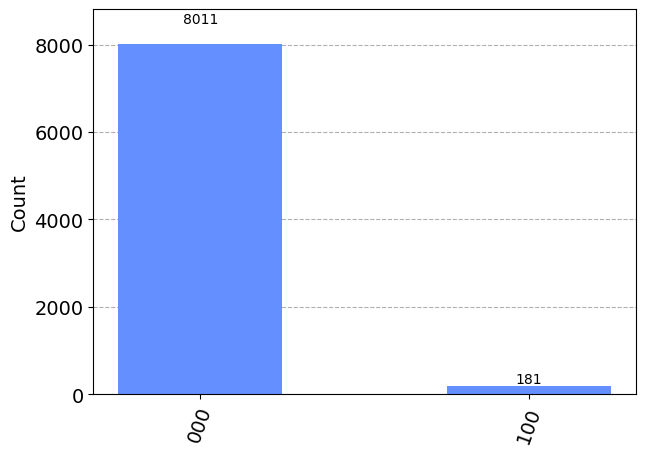

In [5]:
from qiskit_aer.noise import (NoiseModel, depolarizing_error)
from qiskit import Aer

# Define the error rate 
err_rt = 0.01

# Create a depolarizing error for each gate in the circuit
error_1 = depolarizing_error(err_rt,1)
error_3 = depolarizing_error(err_rt,3)

# Create a noise model and add the error to the gates


noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['h'])
noise_model.add_all_qubit_quantum_error(error_3,['cswap'])

simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, simulator)

# Simulate the noisy circuit
noisy_job = assemble(transpiled_qc, shots=8192)
noisy_result = simulator.run(noisy_job, noise_model=noise_model).result()

# Plot the histogram of measurement results
counts = noisy_result.get_counts()
plot_histogram(counts)